## 讀取資料

In [570]:
import pandas as pd

#讀取資料
dataset = pd.read_csv('LoanStats.csv')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning:

Columns (0,19,47,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.



In [571]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423814 entries, 0 to 423813
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 468.8+ MB


In [572]:
dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [573]:
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 計算遺失值比例

In [574]:
(dataset.isna().sum() / len(dataset)).sort_values(ascending=False)

total_cu_tl                            1.000000
sec_app_mort_acc                       1.000000
sec_app_revol_util                     1.000000
sec_app_open_act_il                    1.000000
sec_app_num_rev_accts                  1.000000
sec_app_chargeoff_within_12_mths       1.000000
sec_app_collections_12_mths_ex_med     1.000000
sec_app_mths_since_last_major_derog    1.000000
sec_app_inq_last_6mths                 1.000000
sec_app_earliest_cr_line               1.000000
revol_bal_joint                        1.000000
inq_last_12m                           1.000000
inq_fi                                 1.000000
all_util                               1.000000
max_bal_bc                             1.000000
open_rv_24m                            1.000000
open_rv_12m                            1.000000
il_util                                1.000000
total_bal_il                           1.000000
mths_since_rcnt_il                     1.000000
open_il_24m                            1

In [575]:
((dataset.isna().sum() / len(dataset)) > 0.3).head()

id                  True
member_id           True
loan_amnt          False
funded_amnt        False
funded_amnt_inv    False
dtype: bool

In [576]:
import numpy as np
s = (dataset.isna().sum() / len(dataset)) > 0.3

s.where(s > 0.3)

id                                            1.0
member_id                                     1.0
loan_amnt                                     NaN
funded_amnt                                   NaN
funded_amnt_inv                               NaN
term                                          NaN
int_rate                                      NaN
installment                                   NaN
grade                                         NaN
sub_grade                                     NaN
emp_title                                     NaN
emp_length                                    NaN
home_ownership                                NaN
annual_inc                                    NaN
verification_status                           NaN
issue_d                                       NaN
loan_status                                   NaN
pymnt_plan                                    NaN
url                                           1.0
desc                                          1.0


## 刪除遺失值比例過高的欄位

In [577]:
dataset = dataset.iloc[:,2:111]         
empty_cols = [i for i in range(45,72)]   
dataset = dataset.drop(dataset.columns[empty_cols],axis=1)
#dataset.info()

In [578]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan, 'Late (16-30 days)', 'Default'],
      dtype=object)

## 目標編碼轉換

In [579]:
data_with_loanstatus_sliced = dataset[(dataset['loan_status']=="Fully Paid") | (dataset['loan_status']=="Charged Off")]

In [580]:
#data_with_loanstatus_sliced.info()

In [581]:
dataset['loan_status'].head()

0    Fully Paid
1    Fully Paid
2    Fully Paid
3    Fully Paid
4    Fully Paid
Name: loan_status, dtype: object

In [582]:
di = {"Fully Paid":0, "Charged Off":1}   
Dataset_withBoolTarget = data_with_loanstatus_sliced.replace({"loan_status": di})


In [583]:
Dataset_withBoolTarget['loan_status'].head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

## 探索遺失值

In [584]:
stats = Dataset_withBoolTarget.isnull().sum(axis = 1)

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['e', 'seed', 'clf']
`%matplotlib` prevents importing * from pylab and numpy



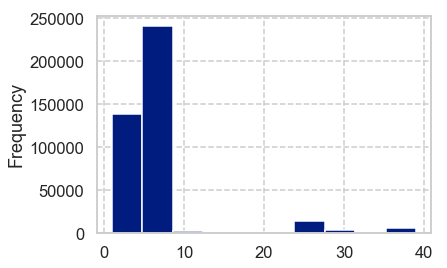

In [585]:
%pylab inline
stats.plot(kind = 'hist')

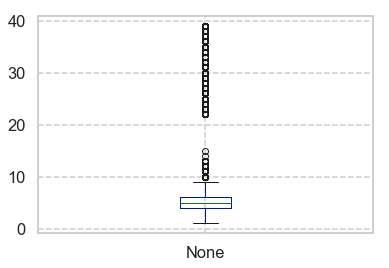

In [586]:
stats.plot(kind = 'box')

In [587]:
stats2 = Dataset_withBoolTarget.isnull().sum(axis = 0)

Populating the interactive namespace from numpy and matplotlib


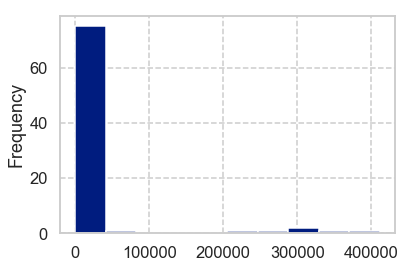

In [588]:
%pylab inline
stats2.plot(kind = 'hist')

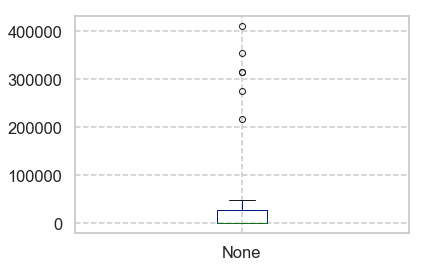

In [589]:
stats2.plot(kind = 'box')

In [590]:
Dataset_withBoolTarget.shape

(411273, 82)

## 刪除遺失值超過 340000 的欄位

In [591]:
dataset=Dataset_withBoolTarget.dropna(thresh = 340000,axis=1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (411273, 76)


In [592]:
stats2 = dataset.isnull().sum(axis = 0)

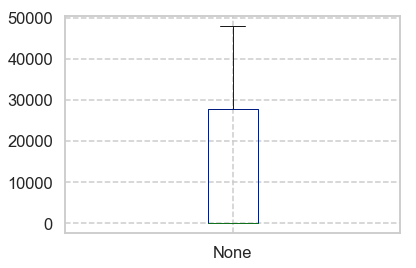

In [593]:
stats2.plot(kind = 'box')

## 移除遺失值過高的欄位

In [594]:
#移除欄位
del_col_names = ["delinq_2yrs",  "last_pymnt_d", "chargeoff_within_12_mths","delinq_amnt","emp_title", "term", "emp_title", "pymnt_plan","purpose","title", "zip_code", "verification_status", "dti","earliest_cr_line", "initial_list_status", "out_prncp",
"pymnt_plan", "num_tl_90g_dpd_24m", "num_tl_30dpd", "num_tl_120dpd_2m", "num_accts_ever_120_pd", "delinq_amnt", 
"chargeoff_within_12_mths", "total_rec_late_fee", "out_prncp_inv", "issue_d"] 
dataset = dataset.drop(labels = del_col_names, axis = 1) 
print("Current shape of dataset :",dataset.shape)

Current shape of dataset : (411273, 54)


In [595]:
(dataset.isna().sum() / len(dataset)).sort_values(ascending= False).head()

mths_since_recent_inq    0.116837
mo_sin_old_il_acct       0.099136
pct_tl_nvr_dlq           0.067824
avg_cur_bal              0.067481
mo_sin_old_rev_tl_op     0.067454
dtype: float64

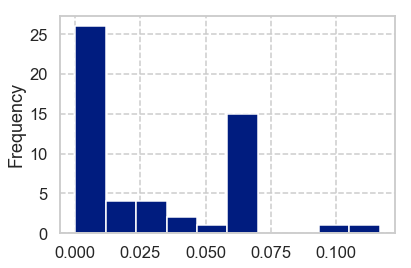

In [596]:
(dataset.isna().sum() / len(dataset)).plot(kind= 'hist')

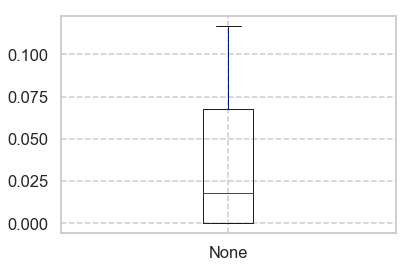

In [597]:
(dataset.isna().sum() / len(dataset)).plot(kind= 'box')

## Plotly
- pip install plotly

In [598]:
!  pip install plotly

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [599]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
pyo.init_notebook_mode(connected=True)

In [600]:
np.random.seed(42)
np.random.randint(1,42,6)

array([39, 29, 15,  8, 21, 39])

In [601]:
np.random.seed(42)
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

In [602]:
data = [
    go.Scatter(
        x = random_x,
        y = random_y,
        mode = 'markers',
    )
]

In [603]:
pyo.iplot(data, filename='scatter1.html')

In [604]:
data = [
    go.Box(
        y=[0, 1, 1, 2, 3, 5, 8, 13, 21],
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8
    )
]
pyo.iplot(data, filename='box.html')

## 欄位篩選

In [605]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] 

In [606]:
Final_data = dataset[features]

In [607]:
Final_data.shape

(411273, 18)

In [608]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3 years,96500.0,MORTGAGE,A,2927.22,1.0,0.0,7.62%,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10+ years,55000.0,OWN,B,6074.19,4.0,0.0,10.99%,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10+ years,130000.0,MORTGAGE,B,398.28,3.0,0.0,11.99%,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0
3,28000.0,5 years,325000.0,MORTGAGE,A,23915.86,5.0,0.0,7.62%,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,0
4,12000.0,4 years,60000.0,RENT,B,3775.55,0.0,0.0,10.99%,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,0


In [609]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 423811
Data columns (total 18 columns):
funded_amnt              411273 non-null float64
emp_length               391832 non-null object
annual_inc               411273 non-null float64
home_ownership           411273 non-null object
grade                    411273 non-null object
last_pymnt_amnt          411273 non-null float64
mort_acc                 403778 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null object
open_acc                 411273 non-null float64
num_actv_rev_tl          383532 non-null float64
mo_sin_rcnt_rev_tl_op    383531 non-null float64
mo_sin_old_rev_tl_op     383531 non-null float64
bc_util                  399679 non-null float64
bc_open_to_buy           399920 non-null float64
avg_cur_bal              383520 non-null float64
acc_open_past_24mths     403778 non-null float64
loan_status              411273 non-null int64
dtypes: float

In [610]:
?Final_data.select_dtypes

In [611]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership,grade,int_rate
0,3 years,MORTGAGE,A,7.62%
1,10+ years,OWN,B,10.99%
2,10+ years,MORTGAGE,B,11.99%
3,5 years,MORTGAGE,A,7.62%
4,4 years,RENT,B,10.99%


In [612]:
Final_data['int_rate'] = Final_data['int_rate'].map(lambda e: float(e.replace('%', '')) )

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [613]:
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (411273, 18)


In [614]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership,grade
0,3 years,MORTGAGE,A
1,10+ years,OWN,B
2,10+ years,MORTGAGE,B
3,5 years,MORTGAGE,A
4,4 years,RENT,B


In [615]:
Final_data['grade'].unique()

array(['A', 'B', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [616]:
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

In [617]:
Final_data.select_dtypes(include='object').head()

,emp_length,home_ownership
0,3 years,MORTGAGE
1,10+ years,OWN
2,10+ years,MORTGAGE
3,5 years,MORTGAGE
4,4 years,RENT


In [618]:
Final_data['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'NONE', 'OTHER', 'ANY'], dtype=object)

In [619]:
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})

In [620]:
Final_data.select_dtypes(include='object').head()

,emp_length
0,3 years
1,10+ years
2,10+ years
3,5 years
4,4 years


In [621]:
Final_data['emp_length'].unique()

array(['3 years', '10+ years', '5 years', '4 years', '6 years', '1 year',
       '2 years', '7 years', '9 years', '8 years', '< 1 year', nan],
      dtype=object)

In [622]:
Final_data["emp_length"] = Final_data["emp_length"].fillna('0')

In [623]:
import re
Final_data["emp_length"] = Final_data["emp_length"].map(lambda e: int(re.search('(\d+)', e).group(0)) )

In [624]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411273 entries, 0 to 411272
Data columns (total 18 columns):
funded_amnt              411273 non-null float64
emp_length               411273 non-null int64
annual_inc               411273 non-null float64
home_ownership           411273 non-null int64
grade                    411273 non-null int64
last_pymnt_amnt          411273 non-null float64
mort_acc                 403778 non-null float64
pub_rec                  411273 non-null float64
int_rate                 411273 non-null float64
open_acc                 411273 non-null float64
num_actv_rev_tl          383532 non-null float64
mo_sin_rcnt_rev_tl_op    383531 non-null float64
mo_sin_old_rev_tl_op     383531 non-null float64
bc_util                  399679 non-null float64
bc_open_to_buy           399920 non-null float64
avg_cur_bal              383520 non-null float64
acc_open_past_24mths     403778 non-null float64
loan_status              411273 non-null int64
dtypes: float64

## 以平均數填補遺失值

In [625]:
s = Final_data.isna().sum() 
s[s>0]

mort_acc                  7495
num_actv_rev_tl          27741
mo_sin_rcnt_rev_tl_op    27742
mo_sin_old_rev_tl_op     27742
bc_util                  11594
bc_open_to_buy           11353
avg_cur_bal              27753
acc_open_past_24mths      7495
dtype: int64

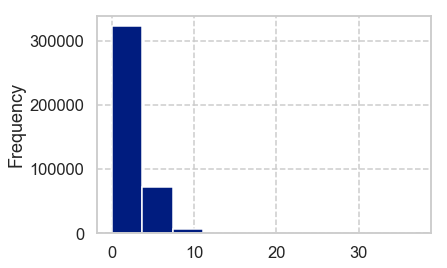

In [626]:
Final_data['mort_acc'].plot(kind = 'hist')

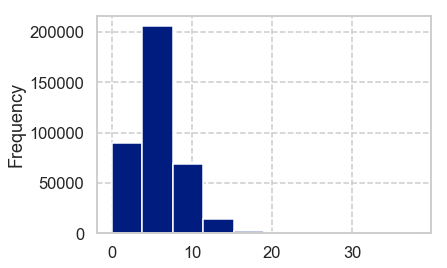

In [627]:
Final_data['num_actv_rev_tl'].plot(kind = 'hist')

In [628]:
Final_data.fillna(Final_data.mean(),inplace = True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (411273, 18)


In [629]:
s = Final_data.isna().sum() 
s

funded_amnt              0
emp_length               0
annual_inc               0
home_ownership           0
grade                    0
last_pymnt_amnt          0
mort_acc                 0
pub_rec                  0
int_rate                 0
open_acc                 0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
acc_open_past_24mths     0
loan_status              0
dtype: int64

In [630]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,12000.0,3,96500.0,6,7,2927.22,1.0,0.0,7.62,17.0,5.0,10.0,118.0,83.5,2441.0,11783.0,4.0,0
1,27050.0,10,55000.0,4,6,6074.19,4.0,0.0,10.99,14.0,4.0,16.0,326.0,53.9,16473.0,9570.0,3.0,0
2,12000.0,10,130000.0,6,6,398.28,3.0,0.0,11.99,9.0,5.0,4.0,193.0,93.0,3567.0,36362.0,4.0,0
3,28000.0,5,325000.0,6,7,23915.86,5.0,0.0,7.62,15.0,5.0,5.0,229.0,67.1,13901.0,53306.0,6.0,0
4,12000.0,4,60000.0,5,6,3775.55,0.0,0.0,10.99,15.0,7.0,1.0,48.0,15.9,15216.0,476.0,8.0,0


## 資料標準化

In [631]:
from sklearn import preprocessing,metrics 
scl = preprocessing.StandardScaler() 


In [632]:
?preprocessing.StandardScaler

In [633]:
Final_data.columns

Index(['funded_amnt', 'emp_length', 'annual_inc', 'home_ownership', 'grade',
       'last_pymnt_amnt', 'mort_acc', 'pub_rec', 'int_rate', 'open_acc',
       'num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op',
       'bc_util', 'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths',
       'loan_status'],
      dtype='object')

In [634]:
fields = Final_data.columns.values[:-1]
fields

array(['funded_amnt', 'emp_length', 'annual_inc', 'home_ownership',
       'grade', 'last_pymnt_amnt', 'mort_acc', 'pub_rec', 'int_rate',
       'open_acc', 'num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_old_rev_tl_op', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths'], dtype=object)

In [635]:
data_clean = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
0,-0.299476,-0.787331,0.429087,0.890293,1.387048,-0.252133,-0.383997,-0.323443,-1.439964,1.134412,-0.248869,-0.220361,-0.730107,0.694300,-0.452627,-0.110954,-0.075437
1,1.520061,1.130234,-0.344829,-2.171730,0.620423,0.263337,1.006702,-0.323443,-0.672232,0.532558,-0.589591,0.167135,1.637470,-0.444565,0.617771,-0.252862,-0.437197
2,-0.299476,1.130234,1.053815,0.890293,0.620423,-0.666370,0.543136,-0.323443,-0.444419,-0.470533,-0.248869,-0.607858,0.123587,1.059815,-0.366732,1.465171,-0.075437
3,1.634916,-0.239455,4.690290,0.890293,1.387048,3.185782,1.470269,-0.323443,-1.439964,0.733176,-0.248869,-0.543275,0.533360,0.063307,0.421572,2.551702,0.648083
4,-0.299476,-0.513393,-0.251586,-0.640718,0.620423,-0.113177,-0.847563,-0.323443,-0.672232,0.733176,0.432574,-0.801606,-1.526888,-1.906622,0.521884,-0.836013,1.371604


In [636]:
data_clean['loan_status'] = Final_data['loan_status']


In [637]:
data_clean.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-0.299476,-0.787331,0.429087,0.890293,1.387048,-0.252133,-0.383997,-0.323443,-1.439964,1.134412,-0.248869,-0.220361,-0.730107,0.694300,-0.452627,-0.110954,-0.075437,0
1,1.520061,1.130234,-0.344829,-2.171730,0.620423,0.263337,1.006702,-0.323443,-0.672232,0.532558,-0.589591,0.167135,1.637470,-0.444565,0.617771,-0.252862,-0.437197,0
2,-0.299476,1.130234,1.053815,0.890293,0.620423,-0.666370,0.543136,-0.323443,-0.444419,-0.470533,-0.248869,-0.607858,0.123587,1.059815,-0.366732,1.465171,-0.075437,0
3,1.634916,-0.239455,4.690290,0.890293,1.387048,3.185782,1.470269,-0.323443,-1.439964,0.733176,-0.248869,-0.543275,0.533360,0.063307,0.421572,2.551702,0.648083,0
4,-0.299476,-0.513393,-0.251586,-0.640718,0.620423,-0.113177,-0.847563,-0.323443,-0.672232,0.733176,0.432574,-0.801606,-1.526888,-1.906622,0.521884,-0.836013,1.371604,0


## Bootstrap Sampling

In [638]:
data_clean['loan_status'].value_counts()

0    340444
1     70829
Name: loan_status, dtype: int64

In [639]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]


In [640]:
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)

In [641]:
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])

In [642]:
data_clean.shape

(11000, 18)

In [643]:
data_clean.index

Int64Index([201953, 403851, 320126,  36777, 189305, 293153, 210823, 192103,
            386699, 369362,
            ...
            349410, 361422, 214463, 306378, 321894, 108284, 248347, 361642,
            396023, 302106],
           dtype='int64', length=11000)

## Reshuffle

In [644]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [645]:
data_clean.index

RangeIndex(start=0, stop=11000, step=1)

In [646]:
print("Current shape of dataset :",data_clean.shape)
data_clean.head()


Current shape of dataset : (11000, 18)


,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-1.417797,1.130234,-0.344829,0.890293,-0.146201,-0.439487,0.079569,-0.323443,0.423550,-0.269915,-0.248869,0.037970,-0.934993,1.086747,-0.635018,0.407560,0.286323,0
1,-0.783074,1.130234,-0.702882,-0.640718,0.620423,-0.687461,-0.847563,1.568027,-0.216606,-0.470533,-0.589591,-0.543275,0.886220,0.244141,-0.385269,-0.753741,-0.798958,1
2,1.151318,0.582358,-0.065100,-0.640718,-0.146201,-0.542035,-0.847563,-0.323443,0.125114,-0.069297,0.773295,-0.349527,-1.640714,1.217563,-0.628305,-0.508592,1.371604,1
3,0.861159,-1.061269,-0.475369,-0.640718,-2.446075,-0.630583,-0.847563,-0.323443,2.207329,-0.671151,-0.589591,-0.866189,-0.513838,-1.002455,0.323244,-0.711290,0.286323,1
4,-0.743782,-0.787331,-0.922936,-0.640718,-0.146201,-0.684129,-0.847563,-0.323443,0.311921,0.331940,0.091852,-0.672440,-0.434160,1.105985,-0.628687,-0.809017,-0.437197,1


In [647]:
data_clean['loan_status'].value_counts()

1    5500
0    5500
Name: loan_status, dtype: int64

In [648]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)

In [649]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8800, 17), (2200, 17), (8800,), (2200,))

## RFE (特徵篩選)

In [650]:
from sklearn import linear_model,svm
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)

LogisticRegression(C=1e+30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [651]:
?RFE

In [652]:
rfe = RFE(clf_LR, 10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values,
              data_clean.iloc[:,-1].values)

In [653]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True  True  True False  True False False False
  True False  True  True  True]
[1 4 1 6 1 1 1 3 1 8 5 7 1 2 1 1 1]


## RFECV  (特徵篩選)

In [654]:
from sklearn.feature_selection import RFECV
rfe2 = RFECV(clf_LR)
rfe2 = rfe2.fit(data_clean.iloc[:,:-1].values,
              data_clean.iloc[:,-1].values)

In [655]:
rfe2.support_

array([ True, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False,  True])

In [656]:
rfe2.ranking_

array([ 1,  8,  1, 10,  1,  1,  4,  7,  1, 12,  9, 11,  5,  6,  3,  2,  1])

## PCA (特徵萃取)

In [657]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))


Expected Variance is [0.16262568 0.15404344 0.12686196 0.07309442 0.07115038 0.06516573
 0.05717912 0.04884113 0.04435844 0.03985688]


<BarContainer object of 10 artists>

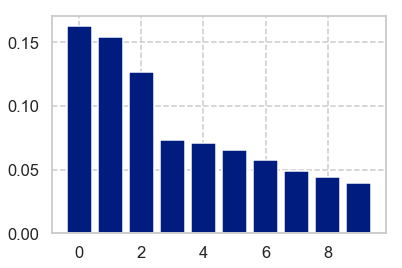

In [658]:
plt.bar(x= range(10), height=pca.explained_variance_ratio_)

## 資料篩選

In [659]:
X_train.columns[rfe.support_]

Index(['funded_amnt', 'annual_inc', 'grade', 'last_pymnt_amnt', 'mort_acc',
       'int_rate', 'mo_sin_old_rev_tl_op', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths'],
      dtype='object')

In [660]:
X_train[X_train.columns[rfe.support_]].head()

,funded_amnt,annual_inc,grade,last_pymnt_amnt,mort_acc,int_rate,mo_sin_old_rev_tl_op,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
10735,0.425921,0.345169,-1.679450,-0.652814,-0.847563,1.494273,0.000000,-0.507169,1.166424e-16,-0.075437
5937,-0.783074,-0.717801,-0.912826,-0.634980,-0.847563,0.824501,-1.174028,-0.589783,-7.454047e-01,-1.160718
7642,-1.266672,-0.624558,-0.146201,-0.708699,-0.847563,0.380265,-1.845600,-0.457203,-7.457895e-01,0.648083
3328,-0.299476,-0.065100,-0.146201,-0.686894,0.079569,-0.216606,1.432584,0.896889,-7.985642e-01,0.286323
8681,0.667720,0.214628,-0.146201,-0.620674,-0.383997,-0.134593,-0.092682,-0.620143,5.611387e-01,0.286323


In [661]:
X_train = X_train[X_train.columns[rfe.support_]]

In [662]:
X_test = X_test[X_test.columns[rfe.support_]]

In [663]:
X_train.shape, X_test.shape

((8800, 10), (2200, 10))

In [664]:
data_clean = data_clean[['funded_amnt', 'annual_inc', 'grade', 'last_pymnt_amnt', 'mort_acc',
       'int_rate', 'mo_sin_old_rev_tl_op', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'loan_status']]

In [665]:
data_clean.shape

(11000, 11)

## Grid Search

In [666]:
from sklearn.model_selection import GridSearchCV

def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    return mean_scores,grid.best_score_,grid.best_estimator_


In [667]:
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)



Best accuracy is 0.8252727272727273
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning:

The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20



In [333]:
mean_scores

[0.7724545454545455,
 0.8029090909090909,
 0.8169090909090909,
 0.8237272727272728,
 0.8251818181818181,
 0.8252727272727273,
 0.8252727272727273]

In [334]:
Best_classifier

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [335]:
Best_classifier.C

100

In [336]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [337]:
from sklearn.metrics import accuracy_score
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
LR_Accuracy

0.8322727272727273

In [338]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, LR_Predict.round())

array([[ 808,  289],
       [  80, 1023]])

In [339]:
LR_Predict

array([9.42308336e-01, 4.79744016e-01, 7.91902481e-01, ...,
       8.10901891e-01, 6.93378514e-01, 4.70539699e-05])

In [340]:
LR_Predict.round()

array([1., 0., 1., ..., 1., 1., 0.])

## ROC Curve

In [341]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")


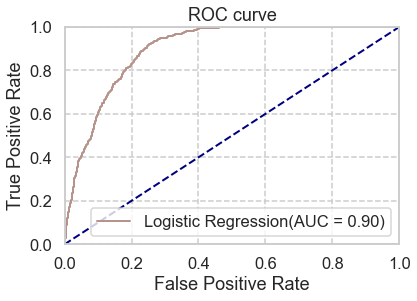

In [342]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()



## SVM

In [669]:
from sklearn import svm
clf_svm = svm.SVC()

In [670]:
?svm.SVC()

In [225]:
powers = range(0,5)
cs = [10**i for i in powers]
cs = [100]

In [226]:
param_grid = dict(C=cs)
grid = GridSearchCV(clf_svm, param_grid, cv=10, scoring='accuracy')
grid.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'C': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [227]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print("---------------")
print(grid.best_estimator_)


---------------
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning:

The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20



In [671]:
#clf_svm = svm.SVC(kernel = "rbf", C=grid.best_estimator_.C)
clf_svm = svm.SVC(kernel = "rbf", C=100)

In [672]:
clf_svm.fit(X_train,y_train)
predictions_svm = clf_svm.predict(X_test)
predictproba_svm = clf_svm.decision_function(X_test)

In [673]:
SVM_Accuracy = accuracy_score(y_test,predictions_svm)
print("SVM accuracy is ",SVM_Accuracy)

SVM accuracy is  0.8072727272727273


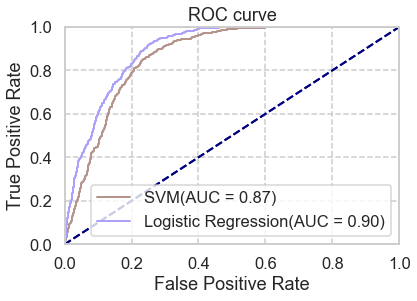

In [674]:
plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()

## Neural Network

In [675]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf_NN.fit(X_train,y_train)     

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [676]:
predict_NN = clf_NN.predict(X_test)
predictproba_NN = clf_NN.predict_proba(X_test)[:,1]
NNAccuracy = accuracy_score(y_test,predict_NN)
print(NNAccuracy)


0.8309090909090909


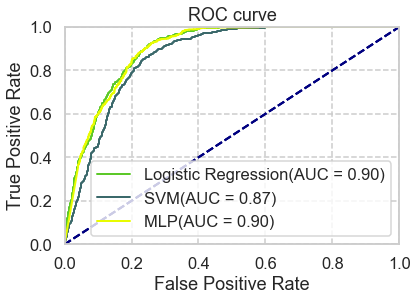

In [677]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,predictproba_NN,'MLP')
plt.show()



## Random Forest

In [678]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', random_state=0)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [679]:
maxFeatures = range(1,data_clean.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
maxFeatures

range(1, 10)

In [680]:
from sklearn.grid_search import RandomizedSearchCV
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
rand.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=9, n_jobs=1,
          param_distributions={'max_features': range(1, 10)},
          pre_dispatch='2*n_jobs', random_state=10, refit=True,
          scoring='accuracy', verbose=0)

In [681]:
mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
print(rand.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [682]:
from sklearn.metrics import accuracy_score
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [683]:
rfPredict = randomForest.predict(X_test)
rfAccuracy = accuracy_score(y_test,rfPredict)
print(rfAccuracy)


0.7990909090909091


In [684]:
rfPredictproba = randomForest.predict_proba(X_test)[:,1] 
roc_score = metrics.roc_auc_score(y_test,rfPredict)

In [685]:
roc_score

0.799069579856379

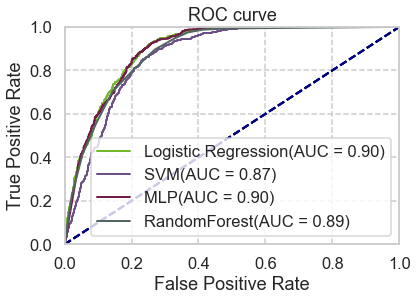

In [686]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,predictproba_NN,'MLP')
plotAUC(y_test,rfPredictproba,'RandomForest')
plt.show()



In [687]:
randomForest.feature_importances_

array([0.07325735, 0.05843408, 0.03773985, 0.49323872, 0.02254668,
       0.08554438, 0.06168504, 0.06336054, 0.06376799, 0.04042538])

In [688]:
# len(randomForest.feature_importances_)

Text(0,0.5,'Normalized Gini Importance')

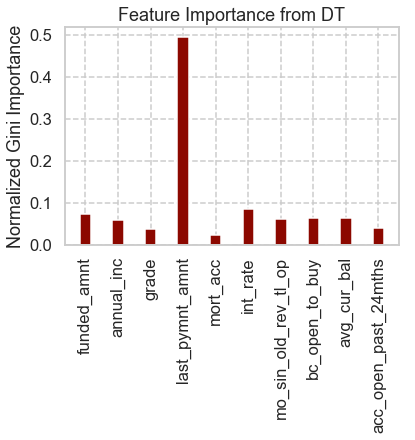

In [689]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(10), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')


## Bagging

In [394]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)


In [395]:
num_trees = 100
model     = BaggingClassifier(base_estimator=randomForest, n_estimators=num_trees, random_state=seed)
results   = model_selection.cross_val_score(model, data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values, cv=kfold)


In [396]:
results

array([0.84090909, 0.82727273, 0.85181818, 0.85090909, 0.82454545,
       0.81818182, 0.83454545, 0.83      , 0.80909091, 0.83363636])

In [397]:
results.mean()

0.8320909090909092

In [398]:
results.std()

0.012792366008646468

In [399]:
model.fit(X_train, y_train)


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [400]:
bagtree_Predict = model.predict_proba(X_test)[:,1]

In [401]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold   = model_selection.KFold(n_splits=10, random_state=seed)
model   = BaggingClassifier(base_estimator=clf_LR, random_state=seed)
results = model_selection.cross_val_score(model, data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values, cv=kfold)
results


array([0.82181818, 0.82909091, 0.82454545, 0.84181818, 0.82      ,
       0.81363636, 0.81454545, 0.83363636, 0.8       , 0.83909091])

In [402]:
results.mean()

0.8238181818181818

In [403]:
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [404]:
baglr_Predict = model.predict_proba(X_test)[:,1]

## Adaboost

In [381]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
?AdaBoostClassifier(n_estimators=50)

In [383]:

Ada_clf = AdaBoostClassifier(n_estimators=50)
scores = cross_val_score(Ada_clf, data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
scores


array([0.83342421, 0.81587561, 0.81942171])

In [384]:
scores.mean()

0.8229071787216987

In [385]:
data_clean.shape

(11000, 11)

In [387]:
Ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [388]:
Ada_clf.predict(X_test)

array([1, 1, 1, ..., 1, 1, 0])

In [391]:
ada_Predict = Ada_clf.predict_proba(X_test)[:,1]

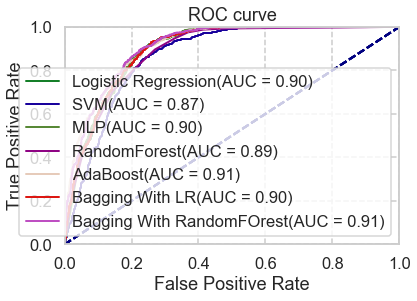

In [405]:
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,predictproba_NN,'MLP')
plotAUC(y_test,rfPredictproba,'RandomForest')
plotAUC(y_test, ada_Predict, 'AdaBoost')
plotAUC(y_test, baglr_Predict, 'Bagging With LR')
plotAUC(y_test, bagtree_Predict, 'Bagging With RandomFOrest')
plt.show()



## XGBoost On Lending Club

In [516]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib
from sklearn.metrics import precision_score

In [517]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((8800, 10), (2200, 10), (8800,), (2200,))

In [518]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



In [519]:
# use svmlight file for xgboost
dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')


[15:48:48] 8800x10 matrix with 87229 entries loaded from dtrain.svm
[15:48:48] 2200x10 matrix with 21827 entries loaded from dtest.svm


In [521]:

# set xgboost params
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

#------------- numpy array ------------------
# training and testing - numpy matrices
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
preds[0:3,:]

array([[0.08858047, 0.9114196 ],
       [0.27270198, 0.7272981 ],
       [0.10499373, 0.89500624]], dtype=float32)

In [522]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 1, 1, ..., 1, 1, 0])

In [523]:
print("Numpy array precision:", precision_score(y_test, best_preds, average='macro'))

Numpy array precision: 0.8472800604903643


In [690]:
from sklearn.metrics import classification_report
print("RF",classification_report(y_test, rfPredict, target_names=None))
print("SVM",classification_report(y_test, predictions_svm, target_names=None))
print("LR",classification_report(y_test, LR_Predict_bin, target_names=None))
print("MLP",classification_report(y_test, predict_NN, target_names=None))


RF              precision    recall  f1-score   support

          0       0.80      0.79      0.80      1097
          1       0.80      0.81      0.80      1103

avg / total       0.80      0.80      0.80      2200

SVM              precision    recall  f1-score   support

          0       0.87      0.72      0.79      1097
          1       0.76      0.90      0.82      1103

avg / total       0.82      0.81      0.81      2200

LR              precision    recall  f1-score   support

          0       0.91      0.74      0.81      1097
          1       0.78      0.93      0.85      1103

avg / total       0.84      0.83      0.83      2200

MLP              precision    recall  f1-score   support

          0       0.91      0.73      0.81      1097
          1       0.78      0.93      0.85      1103

avg / total       0.84      0.83      0.83      2200



## XGBoost

In [406]:
! pip install xgboost

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [407]:
import numpy as np
import xgboost as xgb
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib
from sklearn.metrics import precision_score

In [408]:

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [409]:
# use DMatrix for xgbosot
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [410]:
# use svmlight file for xgboost
dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')


[15:41:14] 120x4 matrix with 480 entries loaded from dtrain.svm
[15:41:14] 30x4 matrix with 120 entries loaded from dtest.svm


In [415]:

# set xgboost params
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

#------------- numpy array ------------------
# training and testing - numpy matrices
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
preds[0:3,:]

array([[0.00563804, 0.97755206, 0.01680986],
       [0.98254657, 0.01395846, 0.00349498],
       [0.00363749, 0.00615226, 0.9902103 ]], dtype=float32)

In [416]:
# extracting most confident predictions
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [417]:
print("Numpy array precision:", precision_score(y_test, best_preds, average='macro'))


Numpy array precision: 1.0


In [418]:
a = np.array([0.2,0.6,0.2])
np.argmax(a)

1

In [419]:
bst_svm = xgb.train(param, dtrain_svm, num_round)
preds = bst.predict(dtest_svm)

best_preds_svm = [np.argmax(line) for line in preds]
print("Svm file precision:",precision_score(y_test, best_preds_svm, average='macro'))

Svm file precision: 1.0


## 迴歸模型 - 房價預測模型

### 資料讀取

In [525]:
import pandas
trainData = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/train.csv')
testData = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/ctbcpy/master/data/test.csv')

In [526]:
trainData.shape

(1460, 81)

In [527]:
testData.shape

(1459, 80)

### 特徵工程

In [528]:
import pandas

trainData['dataType'] ='train'
testData['dataType']  ='test'
SalePrice = trainData['SalePrice']
fullData  = pandas.concat((trainData, testData)).reset_index(drop=True)
fullData.drop(['SalePrice'], axis=1, inplace=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




### 資料清理與補齊遺失值

In [529]:
nullcount = fullData.isnull().sum().sort_values(ascending=False)
percent = (fullData.isnull().sum()/fullData.isnull().count()).sort_values(ascending=False)
percent

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
LotFrontage      0.166495
GarageCond       0.054471
GarageFinish     0.054471
GarageQual       0.054471
GarageYrBlt      0.054471
GarageType       0.053786
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MasVnrType       0.008222
MasVnrArea       0.007879
MSZoning         0.001370
BsmtFullBath     0.000685
Functional       0.000685
BsmtHalfBath     0.000685
Utilities        0.000685
BsmtFinSF1       0.000343
GarageCars       0.000343
Electrical       0.000343
TotalBsmtSF      0.000343
SaleType         0.000343
GarageArea       0.000343
BsmtUnfSF        0.000343
                   ...   
YearRemodAdd     0.000000
YearBuilt        0.000000
WoodDeckSF       0.000000
TotRmsAbvGrd     0.000000
Street           0.000000
ScreenPorch      0.000000
SaleCondition    0.000000
RoofStyle   

In [531]:
fullData['Electrical'].value_counts()
fullData['Electrical'].fillna("SBrkr", inplace=True)
fullData['Electrical'].isnull().sum()

0

In [533]:
fullData['KitchenQual'].value_counts()
fullData['KitchenQual'].fillna("TA", inplace=True)
fullData['KitchenQual'].isnull().sum()

0

In [534]:
fullData['Exterior1st'].fillna("VinylSd", inplace=True)
fullData['Exterior2nd'].fillna("VinylSd", inplace=True)

In [535]:
fullData['MasVnrType'].fillna("None", inplace=True)
fullData['MasVnrType'].isnull().sum()

0

In [536]:
fullData['MasVnrArea'].describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [537]:
fullData['MasVnrArea'].fillna(0.0, inplace=True)
fullData['MasVnrArea'].isnull().sum()

0

In [539]:
fullData['BsmtQual'].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

In [540]:
for col in ['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtFullBath','BsmtHalfBath']:
    print(fullData[col].value_counts())

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64
No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64
0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64


In [541]:
fullData['BsmtQual'].fillna("None", inplace=True)
fullData['BsmtCond'].fillna("None", inplace=True)
fullData['BsmtFinType1'].fillna("None", inplace=True)
fullData['BsmtFinType2'].fillna("None", inplace=True)
fullData['BsmtExposure'].fillna("No", inplace=True)

In [542]:
for col in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    print(fullData[col].describe())

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [543]:
for col in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']:
    print(fullData[col].describe())

fullData['BsmtFinSF1'].fillna(0.0, inplace=True)
fullData['BsmtFinSF2'].fillna(0.0, inplace=True)
fullData['BsmtUnfSF'].fillna(467.0, inplace=True)
fullData['TotalBsmtSF'].fillna(0.0, inplace=True)

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
25%         0.000000
50%       368.500000
75%       733.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64
count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
25%       220.000000
50%       467.000000
75%       805.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
25%       793.000000
50%       989.500000
75%      1302.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


In [544]:
fullData['TotalBsmtSF'].fillna(0.0, inplace=True)

In [545]:

for e in ['GarageCond','GarageType','GarageFinish','GarageQual','GarageCars']:
    print(e)

GarageCond
GarageType
GarageFinish
GarageQual
GarageCars


In [546]:
fullData['GarageType'].fillna("None", inplace=True)
fullData['GarageFinish'].fillna("None", inplace=True)
fullData['GarageCond'].fillna("None", inplace=True)
fullData['GarageQual'].fillna("None", inplace=True)
fullData['GarageYrBlt'].fillna(0.0, inplace=True)

In [547]:
fullData['GarageCars'].fillna(0.0, inplace=True)
fullData['GarageArea'].fillna(0.0, inplace=True)

In [548]:
fullData['Functional'].isnull().sum()

fullData = fullData[fullData['Functional'].notnull()]

In [549]:
fullData['Utilities'].fillna('AllPub', inplace=True)

In [550]:
fullData['SaleType'].fillna('WD', inplace=True)

In [551]:

fullData['MSZoning'].fillna('RL', inplace=True)

In [552]:
fullData['LotFrontage'].describe()

count    2431.000000
mean       69.305224
std        23.352739
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [553]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

def imputeMissing(df, idx, predictors):
    tempdf = df[df[outcome].isnull()].index
    tempndf = df[df[idx].notnull()].index
    model = RandomForestRegressor(n_estimators=100)
    model.fit(df.loc[tempndf, predictors], df.loc[tempndf, [outcome]])
    predict = model.predict(df.loc[tempndf, predictors])
    j=0;
    for i in tempdf:
        df.loc[i,outcome] = predict[j]
        j=j+1
    return(df)

In [554]:
predictors=['LotArea','Street','LotShape','LandContour','LotConfig']
outcome='LotFrontage'

var_mod = ['Street','LotShape','LandContour','LotConfig']
le = LabelEncoder()
for i in var_mod:
    fullData[i] = le.fit_transform(fullData[i].astype(str))

fullData = imputeMissing(fullData,outcome,predictors)
fullData['LotFrontage'].isnull().sum()

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0

### 處理離群值

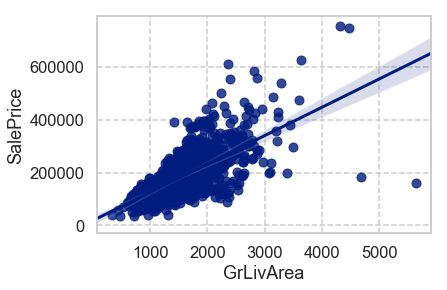

In [555]:
sns.regplot(x=trainData["GrLivArea"], y=trainData["SalePrice"])

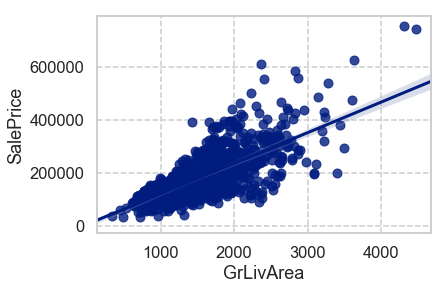

In [556]:
trainData = trainData.drop(trainData[(trainData['GrLivArea']>4000) & (trainData['SalePrice']<200000)].index)
sns.regplot(x=trainData["GrLivArea"], y=trainData["SalePrice"])

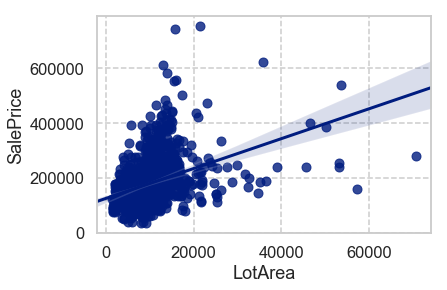

In [557]:
trainData = trainData.drop(trainData[(trainData['LotArea']>100000) & (trainData['SalePrice']<450000)].index)
sns.regplot(x=trainData["LotArea"], y=trainData["SalePrice"])

In [559]:
fullData.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,dataType
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,0,1,8,856.0,AllPub,0,2003,2003,2008,train
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0,1,6,1262.0,AllPub,298,1976,1976,2007,train
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0,1,6,920.0,AllPub,0,2001,2002,2008,train
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0,1,7,756.0,AllPub,0,1915,1970,2006,train
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0,1,9,1145.0,AllPub,192,2000,2000,2008,train


### 建構迴歸模型

In [560]:
skipedCols = ['SalePrice', 'PoolQC','MiscFeature','Alley','Id','Fence','FireplaceQu','dataType']
predictors = [x for x in trainData.columns if x not in skipedCols]

In [561]:
le = LabelEncoder()
for i in predictors:
    trainData[i] = le.fit_transform(trainData[i].astype(str))

In [562]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataType
0,1,9,3,74,853,1,NaN,3,3,0,...,NaN,NaN,NaN,0,4,2,8,4,208500,train
1,2,4,3,89,1024,1,NaN,3,3,0,...,NaN,NaN,NaN,0,7,1,8,4,181500,train
2,3,9,3,77,161,1,NaN,0,3,0,...,NaN,NaN,NaN,0,11,2,8,4,223500,train
3,4,10,3,69,1015,1,NaN,0,3,0,...,NaN,NaN,NaN,0,4,0,8,0,140000,train
4,5,9,3,93,385,1,NaN,0,3,0,...,NaN,NaN,NaN,0,3,2,8,4,250000,train


In [563]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model1, trainData[predictors], trainData['SalePrice'],cv=kfold)

print("CV Score")
print("Mean : {}".format(round(np.mean(results),4)))
print("Standard Deviation : {}".format(round(np.std(results),4)))
print("Min : {}".format(round(np.min(results),4)))
print("Max : {}".format(round(np.max(results),4)))

CV Score
Mean : 0.787
Standard Deviation : 0.0356
Min : 0.7067
Max : 0.8387


### 建構 GradientBoosting 模型

In [564]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [565]:
skipedCols = ['SalePrice', 'PoolQC','MiscFeature','Alley','Id','Fence','FireplaceQu','dataType']
predictors = [x for x in trainData.columns if x not in skipedCols]


le = LabelEncoder()
for i in predictors:
    trainData[i] = le.fit_transform(trainData[i].astype(str))
    
seed = 7
model1 = GradientBoostingRegressor(random_state=10)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model1, trainData[predictors], trainData['SalePrice'],scoring='r2', cv=kfold)

### View the first model performance metrics
print("CV Score")
print("Mean : {}".format(round(np.mean(results),4)))
print("Standard Deviation : {}".format(round(np.std(results),4)))
print("Min : {}".format(round(np.min(results),4)))
print("Max : {}".format(round(np.max(results),4)))

CV Score
Mean : 0.8781
Standard Deviation : 0.0186
Min : 0.8442
Max : 0.9111


In [568]:
clf = GradientBoostingRegressor(random_state=10,
                                learning_rate=0.1, 
                                min_samples_split=100,
                                min_samples_leaf=5,
                                max_depth=7,
                                max_features=28, n_estimators=160,subsample=0.8)
clf.fit(trainData[predictors],trainData['SalePrice'])
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(clf, trainData[predictors], trainData['SalePrice'],scoring='r2', cv=kfold)


In [569]:
### View the first model performance metrics
print("CV Score")
print("Mean : {}".format(round(np.mean(results),4)))
print("Standard Deviation : {}".format(round(np.std(results),4)))
print("Min : {}".format(round(np.min(results),4)))
print("Max : {}".format(round(np.max(results),4)))

CV Score
Mean : 0.8797
Standard Deviation : 0.0294
Min : 0.8334
Max : 0.9212
